In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
with open('mmusculuslr.pkl', 'rb') as f:
    pos_interactions, seq_dict = pickle.load(f)

In [3]:
import matplotlib.pyplot as plt

seq = ["M","D","A","K","R","G","L","C","V","F","S","P","Q","E","I"
           ,"H","Y","T","W","N", "O", "U", "B", "Z", "X", "J"]
look_up_table =  np.zeros((len(seq), len(seq), 3))

map_LUT = dict(zip(seq, range(0, len(seq))))

colours = ["#FFCC99","#F0A3FF","#990000","#808080","#003380","#191919","#00998F",
           "#740AFF","#005C31","#94FFB5","#FFA405","#8F7C00","#FFFF80","#993F00",
           "#FFFF00","#C20088","#4C005C","#2BCE48","#FFFFFF","#FF5005","#0075DC",
           "#9DCC00","#FFA8BB","#426600","#FF0010","#5EF1F2"]

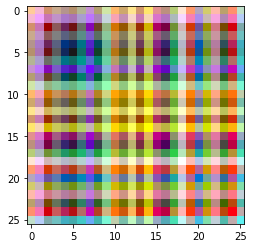

In [4]:
import math
for i in range(len(seq)):
    for j in range(len(seq)):
        cola = colours[map_LUT[seq[i]]].lstrip('#')
        colb = colours[map_LUT[seq[j]]].lstrip('#')
        r1, g1, b1 = tuple(int(cola[i:i+2], 16) for i in (0, 2, 4))
        r2, g2, b2 = tuple(int(colb[i:i+2], 16) for i in (0, 2, 4))
        look_up_table[i, j, 0] = math.sqrt((r1**2 + r2**2)/2)/255
        look_up_table[i, j, 1] = math.sqrt((g1**2 + g2**2)/2)/255
        look_up_table[i, j, 2] = math.sqrt((b1**2 + b2**2)/2)/255

plt.imshow(look_up_table)

In [5]:
from pathlib import Path
Path(os.getcwd()+"/positiveLR").mkdir(parents=True, exist_ok=True)

In [6]:
pos_interactions

,source,target
0,P1,P1
1,P3,P226
2,P3,P100
3,P4,P5
4,P5,P227
...,...,...
251,P218,P351
252,P219,P220
253,P220,P352
254,P221,P353


In [7]:
discarded_images = list()

for it in range(len(pos_interactions)):
    seq1 = seq_dict[pos_interactions.loc[it][0]]
    seq2 = seq_dict[pos_interactions.loc[it][1]]
    if (len(seq1) > 20000 or len(seq2) > 20000):
        discarded_images.append(it)
        continue
    else:  
        fin_img = np.zeros((len(seq1), len(seq2), 3))
        
        for i in range(len(seq1)):
            for j in range(len(seq2)):
                fin_img[i, j, ] = look_up_table[map_LUT[seq1[i]], map_LUT[seq2[j]],]
        
        file_name = str(os.getcwd()+"/positiveLR/" + str(it+1) + "_" + pos_interactions.loc[it][0]
                        + "_" + pos_interactions.loc[it][1] + ".png")
        plt.imsave(file_name, fin_img)

print(discarded_images)

[]
